In [16]:
# Next code is used to personalize the slides format. 
# The customization of the slides was not working for RISE after resuming the presentation, check issue 
# https://github.com/damianavila/RISE/issues/225
#from traitlets.config.manager import BaseJSONConfigManager
#path = "/Users/camilocardona/anaconda/etc/jupyter/nbconfig"
#cm = BaseJSONConfigManager(config_dir=path)
#cm.update('livereveal', {
#              'theme': 'serif',
#              'transition': 'None',
#              'start_slideshow_at': 'selected',
#})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'None'}

In [17]:
import ipywidgets as widgets
from IPython.display import display 
from IPython.display import Image
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from dashboard_auxiliary_functions import process_df_for_widget, hover

In [32]:
# Please decompress before running this command!
traffic_matrix = pd.read_pickle("traffic_matrix.pickle")

<h1>Prototyping explorative dashboards with
Jupyter Notebooks</h1>
<h2>(Examples from Network Engineering)</h2>
<p><strong>Juan Camilo Cardona</strong></p>
<strong>Cisco Systems</strong>
<p>&nbsp;</p>
<p>&nbsp;</p>


# Problem statement

* Context: We are in charge of the analysis or processing of data for a project
* These projects often require users to interact with our data / analysis
    * Modify parameters of optimizations 
    * Trigger operations
    * Explore the data by grouping and filtering 

# Problem statement

* The project UI probably relies in a web front-end framework
    * Pretty and scalable, if well done
* Usually not ready until later stages of the project
* But, we need to receive feedback from users quickly!
    * Validation
    * Allows us to understand the data and the use case better
    * Discover new features

# Problem statement
* It might be cumbersome to implement a prototype on a javascript UI framework. 
* <span style="color:#4B0082">How can we build a prototype without leaving our usual tools?</span>


# Proposal

* Jupyter
* Ipywidgets (jupyter-widgets) +  Jupyter-matplotlib 
* Jupyter-Dashboard

<span style="color:#800000">(Bokeh dashboards is an alternative)</span>


# Ipywidgets (jupyter-widgets)
* Provides interactive HTML widgets for Jupyter
    * Including Buttons, Text fields, HTML fields, etc.

In [19]:
button_widget = widgets.Button(description="A Button")
display(button_widget)

In [20]:
text_widget = widgets.Text(value="Text box")
display(text_widget)

# Ipywidgets (jupyter-widgets)

* Also includes Layout widgets to organize other widgets better 
    * Boxes, Tabs, and accordion
* Layout widgets can have other widget as children (including other layout widgets)


In [21]:
# redefine the buttons and text box, to avoid any problem.
button_1 = widgets.Button(description="Button1")
text_1 = widgets.Text(value="text1")
button_2 = widgets.Button(description="Button2")
text_2 = widgets.Text(value="text2")
# Code for naming tabs on the constructor from http://qiita.com/driller/items/3f53d80a159c29c3d393

In [22]:
# button_1, button_2, text_1, text_2 were defined in other cell.
box_1 = widgets.VBox(children=(button_1, text_1))
layout_description = widgets.Layout(width='1000px', flex_flow='row', 
                                    justify_content='space-between')
box_2 = widgets.HBox(children=(button_2, text_2), layout=layout_description)
display(widgets.Tab(children=(box_1, box_2), _titles={0: "V", 1:"H"}))

# Ipywidgets (jupyter-widgets)
* Basic interaction callbacks


In [23]:
# redefine the buttons and text box, to avoid any problem.
other_button_widget = widgets.Button(description="Button")
other_text_widget = widgets.Text("other_text_widget")

In [24]:
# other_text_widget and other_button_widget were defined in other cell.
def fill_text(caller=None):
    other_text_widget.value = "Button was pressed"
    other_text_widget.disabled = False
        
def disable_text(caller=None):
    caller['owner'].disabled = True

other_button_widget.on_click(fill_text)
other_text_widget.observe(disable_text, names="value")
box = widgets.HBox(children=(other_button_widget, other_text_widget))
display(box)

# Ipywidgets (jupyter-widgets)
## [**Jupyter-matlotlib**](https://github.com/matplotlib/jupyter-matplotlib) 
* A widget for matplot figures
* bqplot is an alternative

# Ipywidgets (jupyter-widgets)
## [**Jupyter-matlotlib**](https://github.com/matplotlib/jupyter-matplotlib) 

In [25]:
figure, axis = plt.subplots()
figure.set_size_inches([ 6,  3 ])
button_mpl = widgets.Button(description="Clear Figure")
button_mpl.on_click(lambda _: (axis.clear(), plt.draw_all()))
button_mpl_2 = widgets.Button(description="Draw Figure")
button_mpl_2.on_click(lambda _: (axis.plot([0, 1, 2, 1]), plt.draw_all()))
axis.plot([0, 1, 2, 1])
box = widgets.HBox(children=(figure.canvas, button_mpl, button_mpl_2))
display(box)

# Jupyter-Dashboard

* Allows the user to arrange the cells outputs in different layouts.

# Why did it work for me ?

* Far from ideal for production, but great for prototypes!
* I needed to show text, graphs, and tables
    * Jupyter-matplotlib supports the widget for the figures
    * Data Frames can be depicted using HTML widgets
        * The style option in DataFrames is very useful
        * <span style="color:#800000">(We still need a better dataframe widget)</span>

# Why did it work for me ?

* Use a "lego" approach to build elements  
    * Widgets are python objects. They can be passed to (returned by) functions
    * Collections of widgets can be "hidden" behind a single layout widget
* Easy way of distributing widgets on the screen.

# Toy example

# Toy example
## Exploring the Internet traffic of a network
### Introduction
* The Internet is formed by the interconnection of around 55k networks, denominated Autonomous Systems.

<center>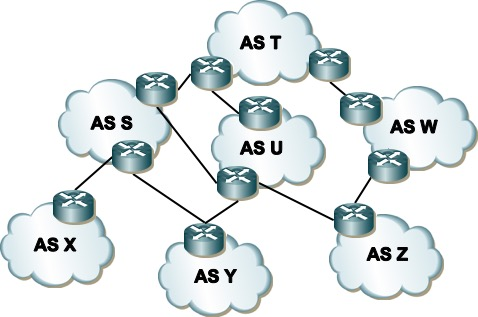</center>

# Toy example
## Exploring the Internet traffic of a network
### Introduction
* ASes establish connectivity based on their business interest.
    * Eg. Customer ASes pay their transit ASes for connectivity
    * Eg. ASes can establish settlement free peerings, and share interconnection costs.

In [26]:
cp_i = widgets.Image(value=open("customer_provider.png", "rb").read(), format='png', width=140, height=200)
p_i = widgets.Image(value=open("peerings.png", "rb").read(), format='png', width=300, height=100)
images = widgets.HBox(children=(cp_i, p_i), 
                     layout=widgets.Layout(width='1000px', flex_flow='row', justify_content='center'))

In [27]:
display(images)

# Toy example
## Exploring the Internet traffic of a network
### Introduction

* the Border Gateway Protocol (BGP) is the protocol used to exchange reachability information 
    * As with most routing protocols, BGP does not deal with traffic congestions.
    * Therefore, it is up to the operator to deal with congestion by balancing traffic across feasible links.
    * This is normally call traffic engineering.


# Toy example
## Exploring the Internet traffic of a network
### Data set
* Fictitious traffic of a Transit providers with six neighboring networks.

In [28]:
traffic_matrix.head()

,DST_NET,SRC_NET,TIME,SRC_ROUTER,DST_ROUTER,SRC_AS,DST_AS,EGRESS_LINK,INGRESS_LINK,BW
0,2001:db8:0110::0/48,2001:db8:0210::0/48,2012-04-27 20:29:59.999997,Frankfurt,Frankfurt,6501,6500,Frankfurt_0,Frankfurt_1,3.217862e+06
1,2001:db8:0110::0/48,2001:db8:0210::0/48,2012-04-27 21:00:00.000000,Frankfurt,Frankfurt,6501,6500,Frankfurt_0,Frankfurt_1,3.496796e+06
2,2001:db8:0110::0/48,2001:db8:0210::0/48,2012-04-27 21:30:00.000003,Frankfurt,Frankfurt,6501,6500,Frankfurt_0,Frankfurt_1,3.359184e+06
3,2001:db8:0110::0/48,2001:db8:0210::0/48,2012-04-27 21:59:59.999997,Frankfurt,Frankfurt,6501,6500,Frankfurt_0,Frankfurt_1,3.760496e+06
4,2001:db8:0110::0/48,2001:db8:0210::0/48,2012-04-27 22:30:00.000000,Frankfurt,Frankfurt,6501,6500,Frankfurt_0,Frankfurt_1,3.194238e+06


# Toy example
## Exploring the Internet traffic of a network
### Use cases
* Provide an interface to explore the data
* Allow the user basic functions to select and balance ingress and egress traffic 
<p>
<p>


# Workflow
1. Operators select (filter) the traffic  wants to explore
2. Operators can choose between exploring:
    * Traffic matrix within the network
    * Ingress traffic
    * Egress traffic
3. For ingress and egress traffic, we provide the option of calculating changes to get a proper load balancing.

** Most of the data is a time series. Let us create a set of widgets that can help us visualize and explore this type of data. **

# Toy example
## Exploring the Internet traffic of a network
### Introduction
* Operators of Internet networks can use their traffic data, to decide among others: 
    * Long terms infrastructure changes: establish new peerings, open new pops, install new backup links.
    * Perform traffic engineering: e.g. Move traffic across links to improve performance 

# Toy example
## Creating a traffic "exploration" widget
* Use a graph to show the traffic in time.
* Use a table to show the summary (sum) of traffic for the individual flows.
* Allows users to select the characteristics over which they want to aggregate
    * There can be millions of flows in the data
    * The widget should only show the top N flows (and takes care of calculating them)

In [29]:
# I am copyting manually the same code as the "dashboard.ipynb" notebook.
# there are ways of importing functions from notebooks, but they look complicated (at least here http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html)
# I could had also defined this in a python file, but I thought it was better in thenotebook.
def ts_widget(df_traffic, aggregation_columns=None, 
                        time_column="TIME", value_column="BW", 
                        top_flows_to_show=5, align_vertically=True):
    '''
    Returns a Box widget containing various widgets used to depict and explore a time series data frame.
    the widget contains:
    - A HTML and a figure widget used to depict the data of the aggregated data frame.
    - A set of check boxes to allow users to select the characteristics shown that are depicted in the figure and table.
    - An update button used to refresh the table and graph widgets when the user changes the checkboxes.
    - A Text box which contains information on the state of the widget (E.g. Processing, Updated, etc.)
    
    The graph and the table are placed horizontally if the align_vertically is False. If selected, a horizontal 
    widget is more compact, but cannot show that much information.
    
    The update function of the update button is a nested function and uses non-local variables.
    '''
    
    # Get the list of aggregation columns. It defaults to any non-time, non-value column in the df.
    if aggregation_columns is None:
        aggregation_columns = list(set(df_traffic.columns) - {time_column, value_column})
        aggregation_columns = sorted(aggregation_columns)
    else:
        aggregation_columns = list(aggregation_columns)
    
    # Defines the layout objects that we will use depending on the widget layout (horizontal or vertical).
    # The values here defined were obtained with trial and error :)
    
    # The only fancy thing here is the use of a variable traffic_traph_box_widget to define whether the 
    # graph and table box is vertical or horizontal
    if align_vertically:
        all_widget_height = "1050px"
        all_widget_width = "1000px"
        
        table_height = "400px"
        table_width = all_widget_width
        
        graph_table_height = '950px'
        
        traffic_traph_box_widget =  widgets.VBox
        figure_size = [ 9.1,  4.8 ]
    else:
        all_widget_height = "700px"
        all_widget_width = "1000px"
        
        graph_table_height = '650px'
        
        table_height = "600px"
        table_width = "500px"
                
        traffic_traph_box_widget =  widgets.HBox
        figure_size = [ 4.8,  4.8 ]
        
    # define the main widget.
    ts_main_widget = widgets.VBox(layout=widgets.Layout(height=all_widget_height, width=all_widget_width))
    
    # the main widget is formed by a control box and the graph_table_box.
    # The control box which contains the check boxes, update butoon and information box.
    # the graph_and table box is self-described.
    control_information_box = widgets.VBox()
    graph_table_box = traffic_traph_box_widget(layout=widgets.Layout(height=graph_table_height, 
                                                                     width=all_widget_width))
    ts_main_widget.children = (control_information_box, graph_table_box)
       
    # Control box
    # the control box is itself formed by:
    # * another box holding the checkboxes
    # * the update button
    # * The information text
    # The first two elements are horitzontally alligned using a box called cbx_update_box
    
    cbx_update_box = widgets.HBox()
    information_widget = widgets.Text(disabled=True, description="State:")
    control_information_box.children = (cbx_update_box, information_widget)
    
    # the cbx is itself divided into the check_box box and the update button.
    # I place the check boxes into their own box to let them have a box space.
   
    check_boxes = {}
    check_boxes_box = widgets.HBox(layout=widgets.Layout(overflow_x='scroll', height='50px', width='850px'))
    for level in aggregation_columns:
        # Create check boxes for each TS characteristic column.
        this_checkbox = widgets.Checkbox(description=level)
        check_boxes_box.children = check_boxes_box.children + (this_checkbox,)
        this_checkbox.value = False
        check_boxes[level] = this_checkbox

    # Update button
    refresh_button = widgets.Button(description="Update")
    cbx_update_box.children = (check_boxes_box, refresh_button)

    # Now, let us finish with the graph and table box.
    fig_prefix_distribution, ax_prefix_distribution = plt.subplots()
    this_canvas = fig_prefix_distribution.canvas
    fig_prefix_distribution.set_size_inches(figure_size)
    this_canvas.figure.set_label("{}".format("Figure"))

    table_box_layout = widgets.Layout(overflow_x='scroll',
                                overflow_y='scroll',
                    #border='3px solid black',
                    width=table_width,
                    height=table_height,
                    flex_direction='row',
                    display='flex')

    table_widget = widgets.HTML()
    table_box_widget = widgets.VBox(children=(table_widget,), layout=table_box_layout)

    graph_table_box.children = (this_canvas, table_box_widget)

    # Finally, define the update function and assign it to the butotn
    def update_compound_widget(caller=None):
        '''
        The update function checks the aggrupation characteristics, calculates the resulting df,
        and updates the table and graph.
        '''

        information_widget.value = "Updating..."
        # find the aggregation level using the check boxes
        aggregation_level = []
        
        for level in check_boxes:
            check_box = check_boxes[level]

            if check_box.value:
                aggregation_level.append(level)

        table_df, graph_df = process_df_for_widget(df_traffic, aggregation_columns=aggregation_level, 
                                                   value_column=value_column, time_column=time_column, 
                                                   top_flows_to_show=top_flows_to_show)
        
        ax_prefix_distribution.clear()
        aggregation_column_name = next(iter(set(graph_df.columns) - {time_column, value_column}))

        graph_df.plot.area(ax=ax_prefix_distribution)

        ax_prefix_distribution.legend_.remove()
        ax_prefix_distribution.legend(bbox_to_anchor=(0.1, 0.85, 0.9, .105), loc=3,
                   ncol=2, mode=None, borderaxespad=0.1, fontsize=8) 
        ax_prefix_distribution.set_ylabel(value_column)
        table_widget.value = table_df.style.set_table_attributes('class="table"').set_table_styles([hover()]).render()

        information_widget.value = "Redrawing..."
        plt.draw_all()
        information_widget.value = "Done"
        
    refresh_button.on_click(update_compound_widget)
    return ts_main_widget

In [30]:
ts_widget(traffic_matrix, top_flows_to_show=10, align_vertically=False, 
          time_column="TIME", value_column="BW")

# Conclusion
In prototyping, the perfect is the enemy of "getting things done".

This set of libraries do have some technical limitations.

Spend enough time to convey your ideas, but do not exaggerate.


# Questions?
<p>
<p>
### Code in: 
https://github.com/jccardonar/pydata_bcn_presentation